In [1]:
import os
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import statsmodels.api as sm
import matplotlib.pyplot as plt
import itertools
import time

loan = pd.read_csv("./Personal_Loan.csv")

In [2]:
loan_pro = loan.dropna().drop(["ID","ZIP Code"],axis=1, inplace=False)
loan_pro = sm.add_constant(loan_pro, has_constant=True)
loan_pro.head()

C:\Users\Gyu\Anaconda3\envs\py37\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


,const,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1.0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,1.0,45,19,34,3,1.5,1,0,0,1,0,0,0
2,1.0,39,15,11,1,1.0,1,0,0,0,0,0,0
3,1.0,35,9,100,1,2.7,2,0,0,0,0,0,0
4,1.0,35,8,45,4,1.0,2,0,0,0,0,0,1


In [4]:
feature_columns = loan_pro.columns.difference(["Personal Loan"])
x = loan_pro[feature_columns]
y = loan_pro["Personal Loan"]

,Age,CCAvg,CD Account,CreditCard,Education,Experience,Family,Income,Mortgage,Online,Securities Account,const
0,25,1.6,0,0,1,1,4,49,0,0,1,1.0
1,45,1.5,0,0,1,19,3,34,0,0,1,1.0
2,39,1.0,0,0,1,15,1,11,0,0,0,1.0
3,35,2.7,0,0,2,9,1,100,0,0,0,1.0
4,35,1.0,0,1,2,8,4,45,0,0,0,1.0
5,37,0.4,0,0,2,13,4,29,155,1,0,1.0
6,53,1.5,0,0,2,27,2,72,0,1,0,1.0
7,50,0.3,0,1,3,24,1,22,0,0,0,1.0
8,35,0.6,0,0,2,10,3,81,104,1,0,1.0
9,34,8.9,0,0,3,9,1,180,0,0,0,1.0


In [9]:
train_x, test_x, train_y, test_y  = train_test_split(x,y,test_size=0.3, random_state = 42)
model = sm.Logit(train_y,train_x)
results = model.fit(method="newton")
results.summary()

Optimization terminated successfully.
         Current function value: 0.141370
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          Personal Loan   No. Observations:                 1750
Model:                          Logit   Df Residuals:                     1738
Method:                           MLE   Df Model:                           11
Date:                Fri, 11 Oct 2019   Pseudo R-squ.:                  0.5583
Time:                        20:02:36   Log-Likelihood:                -247.40
converged:                       True   LL-Null:                       -560.06
Covariance Type:            nonrobust   LLR p-value:                5.369e-127
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Age                    0.0311      0.092      0.338      0.736      -0.149       0.211
CCAvg                  0.1132      0.061      1.855      0.064      -0.006       0.233
CD Account             3.9479      0.539      7.319      0.000       2.891       5.005
CreditCard            -1.2382      0.338     -3.667      0.000      -1.900      -0.576
Education              1.4477      0.179      8.084      0.000       1.097       1.799
Experience            -0.0211      0.091     -0.231      0.818      -0.200       0.158
Family                 0.6165      0.120      5.129      0.000       0.381       0.852
Income                 0.0488      0.004     12.518      0.000       0.041       0.056
Mortgage              -0.0004      0.001     -0.480      0.631      -0.002       0.001
Online                -0.2213      0.252     -0.877      0.380      -0.716       0.273
Securities Account    -1.1837      0.503     -2.355      0.019      -2.169      -0.198
const                -12.8975      2.507     -5.144      0.000     -17.811      -7.984
======================================================================================
"""

In [5]:
pred_y = results.predict(test_x)
np.sort(pred_y)

array([4.99601921e-05, 5.39201678e-05, 7.28403742e-05, 8.02412684e-05,
       8.50739781e-05, 8.58342298e-05, 8.59976212e-05, 8.84020855e-05,
       8.99072302e-05, 9.09127208e-05, 9.20899473e-05, 1.04080966e-04,
       1.05912784e-04, 1.56787891e-04, 1.59627451e-04, 1.59793213e-04,
       1.71386111e-04, 1.73492161e-04, 1.75289895e-04, 1.83799382e-04,
       1.84258076e-04, 1.89383723e-04, 1.98128388e-04, 2.06407694e-04,
       2.16062365e-04, 2.33214169e-04, 2.37618241e-04, 2.40048922e-04,
       2.43503314e-04, 2.46652188e-04, 2.50313367e-04, 2.52947129e-04,
       2.54932837e-04, 2.57764701e-04, 2.69608749e-04, 2.70512149e-04,
       2.72308485e-04, 2.73200545e-04, 2.77950041e-04, 2.78926181e-04,
       2.93287925e-04, 2.94186945e-04, 3.05161619e-04, 3.23644076e-04,
       3.25286304e-04, 3.35961021e-04, 3.38136810e-04, 3.38946131e-04,
       3.42354741e-04, 3.52421572e-04, 3.54264712e-04, 3.76443526e-04,
       3.86933550e-04, 3.92557087e-04, 3.95514509e-04, 3.96762108e-04,
      

In [6]:
def cut_off(y,threshold):
    y1 = y.copy()
    y1[y1>threshold]=1
    y1[y1<=threshold]=0
    return(y1.astype(int))
pred_y = cut_off(pred_y,0.5)
pred_y[1:5]

1114    0
1064    1
2287    0
1537    0
dtype: int32

In [7]:
cfmat = confusion_matrix(test_y,pred_y)
print(cfmat)
print(test_y)

[[661   4]
 [ 23  62]]
1447    0
1114    0
1064    1
2287    0
1537    0
       ..
427     0
105     0
2044    0
121     0
821     0
Name: Personal Loan, Length: 750, dtype: int64


In [8]:
def acc(cfmat):
    acc = (cfmat[0,0]+cfmat[1,1])/(cfmat[0,0]+cfmat[1,1]+(cfmat[0,1]+cfmat[1,0]))
    return acc

In [9]:
threshold = np.arange(0,1.1,0.1)
pred_y = results.predict(test_x)
table = pd.DataFrame(columns=['ACC'])
for i in threshold:
    pred_Y = cut_off(pred_y,i)
    cfmat = confusion_matrix(test_y,pred_Y)
    table.loc[i] = acc(cfmat)

table.columns.name='performance'
table

performance,ACC
threshold,
0.0,0.113333
0.1,0.896000
0.2,0.933333
0.3,0.945333
0.4,0.952000
0.5,0.964000
0.6,0.957333
0.7,0.950667
0.8,0.941333


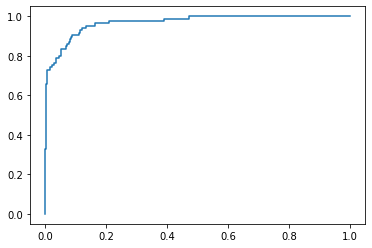

In [10]:
fpr, tpr, thresholds = metrics.roc_curve(test_y,pred_y, pos_label=1)
plt.plot(fpr,tpr)

In [11]:
auc = np.trapz(tpr,fpr)
auc

0.9692879256965944

In [13]:
from sklearn.linear_model import  Ridge,Lasso,ElasticNet

train_x.head()

,Age,CCAvg,CD Account,CreditCard,Education,Experience,Family,Income,Mortgage,Online,Securities Account,const
1552,29,4.3,0,0,1,5,1,195,0,0,0,1.0
2290,38,0.7,0,0,3,13,4,78,0,1,0,1.0
1398,42,3.5,0,0,1,18,1,141,0,0,0,1.0
1775,46,0.8,0,0,3,22,1,73,117,0,0,1.0
2299,62,0.1,0,0,3,37,3,15,91,0,0,1.0


In [14]:
l = Lasso(alpha=0.001)
l.fit(train_x,train_y)

Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [17]:
li = Ridge(alpha=0.01)
li.fit(train_x,train_y)
pred_y_l = l.predict(test_x)
pred_y_l = cut_off(pred_y_l,0.5)
cfmat = confusion_matrix(test_y,pred_y_l)
print(cfmat)

[[664   1]
 [ 54  31]]


0.6816010614772225

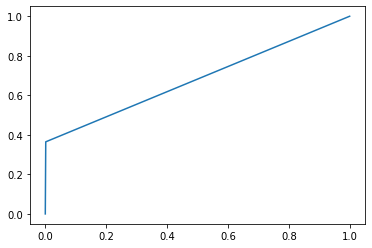

In [19]:
fpr, tpr, thresholds = metrics.roc_curve(test_y,pred_y_l, pos_label=1)
plt.plot(fpr,tpr)
auc = np.trapz(tpr,fpr)
auc

In [22]:
pred_y_ll = li.predict(test_x)
pred_y_ll = cut_off(pred_y_ll,0.5)
cfmat = confusion_matrix(test_y,pred_y_ll)
print(acc(cfmat))

0.9346666666666666


0.7271561256081379

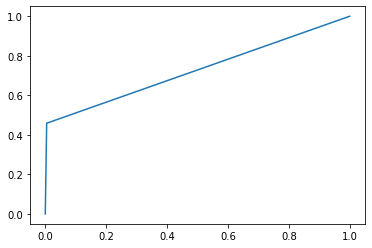

In [21]:
fpr, tpr, thresholds = metrics.roc_curve(test_y,pred_y_ll, pos_label=1)
plt.plot(fpr,tpr)
auc = np.trapz(tpr,fpr)
auc

In [24]:
alpha = np.logspace(-3,2,6)
data=[]
acc_table=[]
for i, a in enumerate(alpha):
    lasso = Lasso(alpha=a).fit(train_x,train_y)
    data.append(pd.Series(np.hstack([lasso.intercept_,lasso.coef_])))
    pred_y = lasso.predict(test_x)
    pred_y = cut_off(pred_y,0.5)
    cfmat = confusion_matrix(test_y,pred_y)
    acc_table.append((acc(cfmat)))
df_lasso = pd.DataFrame(data, index=alpha).T
acc_table_lasso = pd.DataFrame(acc_table, index=alpha).T

In [26]:
acc_table_lasso

,0.001,0.010,0.100,1.000,10.000,100.000
0,0.934667,0.926667,0.888,0.886667,0.886667,0.886667


In [25]:
df_lasso

,0.001,0.010,0.100,1.000,10.000,100.000
0,-0.305496,-0.354916,-0.135435,-0.103377,0.097714,0.097714
1,-0.002725,0.000000,0.000000,0.000000,-0.000000,-0.000000
2,0.011916,0.007171,0.000000,0.000000,0.000000,0.000000
3,0.313641,0.105372,0.000000,0.000000,0.000000,0.000000
4,-0.036546,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000
5,0.074662,0.062770,0.000000,0.000000,0.000000,0.000000
6,0.003341,0.000635,0.000000,0.000000,-0.000000,-0.000000
7,0.030942,0.025280,0.000000,0.000000,0.000000,0.000000
8,0.003014,0.003237,0.003107,0.002716,0.000000,0.000000
9,0.000021,0.000050,0.000066,0.000009,0.000000,0.000000


([<matplotlib.axis.XTick at 0x1c9479d6198>,
 <a list of 6 Text xticklabel objects>)

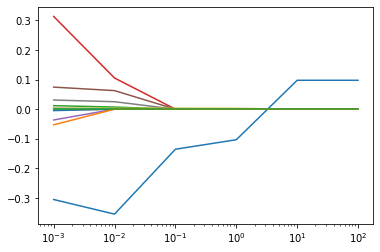

In [28]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.semilogx(df_lasso.T)
plt.xticks(alpha)